In [1]:
from sklearn.model_selection import GridSearchCV, KFold, train_test_split
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.preprocessing import StandardScaler
from xgboost import plot_importance
import matplotlib.pyplot as plt
import xgboost as xgb
import pandas as pd
import numpy as np

pd.set_option("display.max_columns", None)

In [2]:
identifier_name = 'flight_id'

most_important_features_names = [
     'wtc',
     'flown_distance',
     'aircraft_type',
     'longitude_max',
     'altitude_median',
     'groundspeed_max',
     'airline',
     'groundspeed_75percentile',
     'altitude_25percentile',
     'flight_duration',
     'latitude_min',
     'vertical_rate_std',
     'altitude_75percentile',
     'longitude_median',
     'longitude_std',
     'vertical_rate_25percentile',
     'longitude_min',
     'longitude_mean',
     'adep',
     'vertical_rate_max',
     'ades',
     'latitude_std',
     'latitude_max',
     'longitude_25percentile',
     'altitude_mean',
     'latitude_mean',
     'vertical_rate_75percentile',
     'latitude_median',
     'groundspeed_min',
     'country_code_adep',
     'country_code_ades',
     'latitude_25percentile',
     'longitude_count',
     'groundspeed_25percentile',
     'vertical_rate_min',
     'longitude_75percentile',
     'track_75percentile',
     'taxiout_time',
     'track_median',
     'vertical_rate_median',
     'latitude_75percentile',
     'track_25percentile',
     'month_day',
     'latitude_count',
     'altitude_std',
     'arrival_time_hour',
     'track_mean',
     'arrival_time_hour_minute',
     'vertical_rate_mean'
]

target_name = 'tow'

global_random_state = 123

In [3]:
encoded_challenge_set = pd.read_csv('data/encoded_challenge_set.csv')

display(encoded_challenge_set)

,flight_id,month_day,month,day,actual_offblock_time_hour_minute,actual_offblock_time_hour,actual_offblock_time_minute,adep,country_code_adep,arrival_time_hour_minute,arrival_time_hour,arrival_time_minute,ades,country_code_ades,aircraft_type,wtc,airline,flight_duration,taxiout_time,flown_distance,tow,latitude_count,latitude_mean,latitude_std,latitude_min,latitude_25percentile,latitude_median,latitude_75percentile,latitude_max,longitude_count,longitude_mean,longitude_std,longitude_min,longitude_25percentile,longitude_median,longitude_75percentile,longitude_max,altitude_count,altitude_mean,altitude_std,altitude_min,altitude_25percentile,altitude_median,altitude_75percentile,altitude_max,groundspeed_count,groundspeed_mean,groundspeed_std,groundspeed_min,groundspeed_25percentile,groundspeed_median,groundspeed_75percentile,groundspeed_max,track_count,track_mean,track_std,track_min,track_25percentile,track_median,track_75percentile,track_max,vertical_rate_count,vertical_rate_mean,vertical_rate_std,vertical_rate_min,vertical_rate_25percentile,vertical_rate_median,vertical_rate_75percentile,vertical_rate_max,u_component_of_wind_count,u_component_of_wind_mean,u_component_of_wind_std,u_component_of_wind_min,u_component_of_wind_25percentile,u_component_of_wind_median,u_component_of_wind_75percentile,u_component_of_wind_max,v_component_of_wind_count,v_component_of_wind_mean,v_component_of_wind_std,v_component_of_wind_min,v_component_of_wind_25percentile,v_component_of_wind_median,v_component_of_wind_75percentile,v_component_of_wind_max,temperature_count,temperature_mean,temperature_std,temperature_min,temperature_25percentile,temperature_median,temperature_75percentile,temperature_max,specific_humidity_count,specific_humidity_mean,specific_humidity_std,specific_humidity_min,specific_humidity_25percentile,specific_humidity_median,specific_humidity_75percentile,specific_humidity_max
0,248763780,0,1,1,826,13,46,70,37,904,15,4,82,36,4,1,20,61,18,321,54748.000000,3614,51.837035,0.161396,51.453232,51.774945,51.892997,51.942919,52.028643,3614,-4.817843,2.655620,-8.574295,-7.346304,-4.895513,-2.418875,-0.443802,3614,20991.546763,11779.780447,-25.0,9550.00,26175.0,32000.0,44925.0,3614,317.680733,78.038696,102.0,260.25,362.0,368.0,390.0,3614,266.916090,31.242167,158.552264,270.944437,274.162435,275.911467,294.606984,3614,9.470294,1609.709745,-5696.0,-704.0,0.0,368.0,5568.0,3614,31.190835,11.226974,2.079101,21.859036,33.315629,42.312533,43.086684,3614,28.838399,10.453295,6.718876,18.656661,34.227659,38.804418,39.661651,3614,245.133930,23.513594,214.398682,223.693654,233.527545,268.945607,288.078244,3614,0.001569,0.002304,0.000003,0.000022,0.000114,0.002915,0.008067
1,248760618,0,1,1,595,9,55,220,33,1177,19,37,168,80,18,0,10,570,13,4193,185441.000000,10358,36.416839,6.193836,25.803905,31.443732,35.748230,42.505463,43.390968,10358,-37.864321,32.832625,-80.492389,-66.559062,-60.346413,-4.094342,2.097078,10358,29599.616239,11763.166165,-350.0,33000.00,33000.0,38000.0,60500.0,10358,422.276898,99.069028,109.0,431.00,456.0,484.0,495.0,10358,249.189327,44.338665,0.000000,230.543696,238.620818,283.594836,359.699238,10358,80.330693,691.174222,-1984.0,0.0,0.0,0.0,3328.0,10358,18.727762,10.305791,-2.300409,11.039084,20.462232,25.202863,37.516757,10358,-11.067672,26.301068,-55.784183,-38.585465,2.571138,8.923772,24.558820,10358,231.419524,27.394109,211.161961,213.591163,221.159904,221.850708,298.691536,10358,0.001025,0.003064,0.000002,0.000028,0.000044,0.000085,0.013049
2,248753824,0,1,1,579,9,39,139,88,1148,19,8,171,80,7,0,18,554,15,3770,230396.000000,12932,54.653675,8.598085,41.965164,44.087809,60.114143,61.133171,63.104782,12932,-33.600731,43.183849,-88.239066,-85.001760,-22.770120,7.996781,17.939514,12932,29266.370244,12070.365491,-125.0,24275.00,36000.0,36000.0,47800.0,12932,360.673250,82.928796,89.0,334.00,376.0,406.0,470.0,12932,245.620910,50.973566,1.423205,227.842138,269.252706,278.778859,359.288288,12932,-38.192179,687.891983,-1728.0,0.0,0.0,0.0,3072.0,

In [4]:
encoded_challenge_set = pd.read_csv('data/encoded_challenge_set.csv')

features = encoded_challenge_set[most_important_features_names].copy()
display(features)

target = encoded_challenge_set[[target_name]].copy()
display(target)

,wtc,flown_distance,aircraft_type,longitude_max,altitude_median,groundspeed_max,airline,groundspeed_75percentile,altitude_25percentile,flight_duration,latitude_min,vertical_rate_std,altitude_75percentile,longitude_median,longitude_std,vertical_rate_25percentile,longitude_min,longitude_mean,adep,vertical_rate_max,ades,latitude_std,latitude_max,longitude_25percentile,altitude_mean,latitude_mean,vertical_rate_75percentile,latitude_median,groundspeed_min,country_code_adep,country_code_ades,latitude_25percentile,longitude_count,groundspeed_25percentile,vertical_rate_min,longitude_75percentile,track_75percentile,taxiout_time,track_median,vertical_rate_median,latitude_75percentile,track_25percentile,month_day,latitude_count,altitude_std,arrival_time_hour,track_mean,arrival_time_hour_minute,vertical_rate_mean
0,1,321,4,-0.443802,26175.0,390.0,20,368.0,9550.00,61,51.453232,1609.709745,32000.0,-4.895513,2.655620,-704.0,-8.574295,-4.817843,70,5568.0,82,0.161396,52.028643,-7.346304,20991.546763,51.837035,368.0,51.892997,102.0,37,36,51.774945,3614,260.25,-5696.0,-2.418875,275.911467,18,274.162435,0.0,51.942919,270.944437,0,3614,11779.780447,15,266.916090,904,9.470294
1,0,4193,18,2.097078,33000.0,495.0,10,484.0,33000.00,570,25.803905,691.174222,38000.0,-60.346413,32.832625,0.0,-80.492389,-37.864321,220,3328.0,168,6.193836,43.390968,-66.559062,29599.616239,36.416839,0.0,35.748230,109.0,33,80,31.443732,10358,431.00,-1984.0,-4.094342,283.594836,13,238.620818,0.0,42.505463,230.543696,0,10358,11763.166165,19,249.189327,1177,80.330693
2,0,3770,7,17.939514,36000.0,470.0,18,406.0,24275.00,554,41.965164,687.891983,36000.0,-22.770120,43.183849,0.0,-88.239066,-33.600731,139,3072.0,171,8.598085,63.104782,-85.001760,29266.370244,54.653675,0.0,60.114143,89.0,88,80,44.087809,12932,334.00,-1728.0,7.996781,278.778859,15,269.252706,0.0,61.133171,227.842138,0,12932,12070.365491,19,245.620910,1148,-38.192179
3,0,3607,21,8.637296,38000.0,478.0,10,460.0,30000.00,497,39.524386,670.081295,39975.0,-59.086533,33.535859,-64.0,-75.200562,-36.308858,343,4224.0,172,4.887211,54.923820,-69.237322,32681.139500,47.313159,0.0,47.763176,104.0,19,80,42.496536,17534,404.00,-2112.0,-2.139416,294.800965,11,271.127724,-64.0,51.502545,228.858036,0,17534,11549.367080,19,259.543237,1172,-47.593019
4,1,305,1,0.029984,16850.0,498.0,20,430.0,7025.00,55,51.464942,1609.815425,31000.0,-1.853394,2.100484,-896.0,-6.399455,-2.412936,93,4224.0,60,0.731746,53.426793,-4.134391,17836.102603,52.449270,768.0,52.485926,123.0,44,27,51.682892,3265,260.00,-3072.0,-0.433886,139.555775,14,137.428049,-256.0,53.206329,99.056120,0,3265,11661.560716,13,145.083718,824,-14.074119
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369008,0,4046,21,2.558947,34000.0,521.0,10,477.0,28768.75,545,25.811234,870.857796,36975.0,-62.147083,34.354707,-64.0,-80.441687,-40.831541,257,4160.0,168,9.563126,49.090393,-69.023288,29688.784438,38.877157,0.0,34.402197,137.0,36,80,32.045397,10744,380.00,-2688.0,-4.419947,270.751870,21,251.458355,-64.0,49.029201,245.099119,364,10744,10902.804318,19,246.708174,1143,-65.664288
369009,1,946,1,28.944917,34000.0,426.0,14,395.0,30787.50,158,41.182114,856.019220,34025.0,21.143944,4.738333,-64.0,13.501244,21.168711,391,3584.0,15,3.546660,52.425594,17.159999,29129.706377,47.262027,0.0,47.335968,101.0,96,19,44.200717,9519,372.00,-2240.0,25.316283,319.431039,25,315.432413,0.0,50.561453,313.032203,364,9519,9628.394713,12,309.516435,749,-10.504150
369010,1,522,4,6.777954,35975.0,381.0,20,336.0,20368.75,99,51.266816,1231.417354,36000.0,0.316788,4.047513,-64.0,-6.267151,0.286890,30,3840.0,83,0.735722,53.728592,-3.278382,27860.307460,52.913110,64.0,53.203024,93.0,26,36,52.352230,5952,314.00,-4032.0,3.818993,293.930164,11,281.587728,0.0,53.526403,278.953705,364,5952,11773.056560,11,281.881408,701,3.408602
369011,1,466,1,2.556927,35375.0,473.0,20,365.0,1

,tow
0,54748.000000
1,185441.000000
2,230396.000000
3,157615.000000
4,70318.447226
...,...
369008,163438.000000
369009,78707.000000
369010,62942.750000
369011,72611.161024


In [5]:
# Function to score model using Root Mean Square Error
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))
    
# Create a scorer
rmse_scorer = make_scorer(rmse, greater_is_better=False)

# Make cross validation strategy
cv_strategy = KFold(n_splits=3, shuffle=True, random_state=global_random_state)

In [6]:
param_grid = {
    'learning_rate': [0.01, 0.2, 1.0],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'min_child_weight': [8, 9, 10],
}

model = xgb.XGBRegressor(
    n_estimators=850,
    max_depth=9,
    objective='reg:squarederror', 
    eval_metric='rmse',
    random_state=global_random_state
)

grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring='neg_root_mean_squared_error', # Use RMSE (negative because scikit-learn maximizes scores)
    cv=cv_strategy,
    verbose=2,
    n_jobs=-1
)

grid_search.fit(features, target)

best_params = grid_search.best_params_
print("Best parameters:", best_params)
print("Best RMSE:", -grid_search.best_score_) # Negate the score to get RMSE

Fitting 3 folds for each of 81 candidates, totalling 243 fits
Best parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.2, 'min_child_weight': 9, 'subsample': 1.0}
Best RMSE: 2858.3085356585557


<Figure size 1000x800 with 0 Axes>

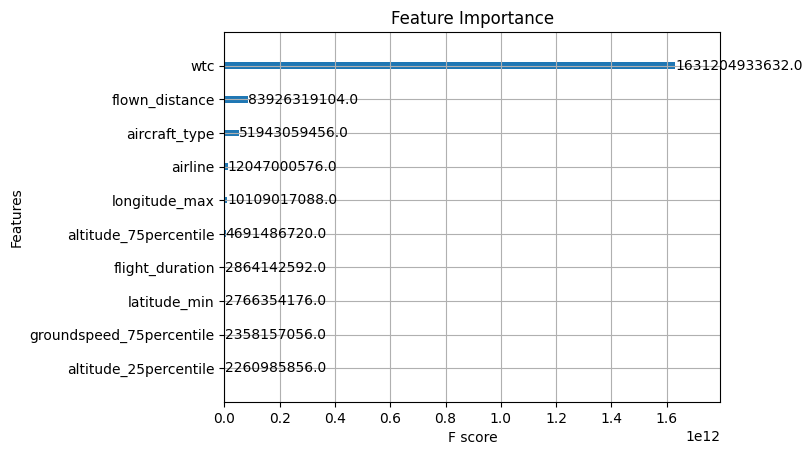

In [7]:
best_model = grid_search.best_estimator_

# Plot feature importance
plt.figure(figsize=(10, 8))
xgb.plot_importance(best_model, importance_type='gain', max_num_features=10)
plt.title('Feature Importance')
plt.show()

In [8]:
booster = best_model.get_booster()

# Create a DataFrame with all feature names
all_features = pd.DataFrame(features.columns, columns=['Feature'])

# Get the importance of the features
importance_dict = booster.get_score(importance_type='gain')
importance_df = pd.DataFrame(importance_dict.items(), columns=['Feature', 'Importance'])

# Merge with all features to include those with zero importance
importance_full_df = all_features.merge(importance_df, on='Feature', how='left').fillna(0)

# Sort the DataFrame in ascending order
importance_full_df_sorted = importance_full_df.sort_values(by='Importance', ascending=False).reset_index(drop=True)

display(importance_full_df_sorted)

,Feature,Importance
0,wtc,1.631205e+12
1,flown_distance,8.392632e+10
2,aircraft_type,5.194306e+10
3,airline,1.204700e+10
4,longitude_max,1.010902e+10
5,altitude_75percentile,4.691487e+09
6,flight_duration,2.864143e+09
7,latitude_min,2.766354e+09
8,groundspeed_75percentile,2.358157e+09
9,altitude_25percentile,2.260986e+09


In [9]:
print(list(importance_full_df_sorted["Importance"].values))

[1631204933632.0, 83926319104.0, 51943059456.0, 12047000576.0, 10109017088.0, 4691486720.0, 2864142592.0, 2766354176.0, 2358157056.0, 2260985856.0, 1863037184.0, 1505090304.0, 1288504320.0, 835473472.0, 521128320.0, 476236416.0, 467626976.0, 428336512.0, 362488288.0, 328224352.0, 283990336.0, 203423264.0, 200644192.0, 188972080.0, 169183536.0, 146334048.0, 140686592.0, 113767144.0, 108096056.0, 103824776.0, 100601680.0, 93053960.0, 85238488.0, 75303432.0, 68033048.0, 67205528.0, 65101556.0, 64867528.0, 63441596.0, 59020216.0, 51697296.0, 43747904.0, 43604312.0, 42022148.0, 39912016.0, 38770052.0, 36470512.0, 35799708.0, 28935414.0]


In [10]:
print(str(list(importance_full_df_sorted["Feature"].values)).replace(",", ",\n"))

['wtc',
 'flown_distance',
 'aircraft_type',
 'airline',
 'longitude_max',
 'altitude_75percentile',
 'flight_duration',
 'latitude_min',
 'groundspeed_75percentile',
 'altitude_25percentile',
 'groundspeed_max',
 'vertical_rate_std',
 'longitude_mean',
 'altitude_median',
 'longitude_min',
 'latitude_max',
 'longitude_std',
 'vertical_rate_max',
 'longitude_75percentile',
 'vertical_rate_25percentile',
 'ades',
 'latitude_std',
 'longitude_25percentile',
 'country_code_adep',
 'vertical_rate_75percentile',
 'adep',
 'country_code_ades',
 'altitude_mean',
 'latitude_mean',
 'longitude_median',
 'latitude_75percentile',
 'month_day',
 'latitude_median',
 'latitude_25percentile',
 'longitude_count',
 'altitude_std',
 'groundspeed_min',
 'vertical_rate_median',
 'latitude_count',
 'taxiout_time',
 'track_75percentile',
 'arrival_time_hour_minute',
 'track_median',
 'arrival_time_hour',
 'track_25percentile',
 'track_mean',
 'groundspeed_25percentile',
 'vertical_rate_mean',
 'vertical_rat